1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
#author Federico Pilotto 2107076
#imports cell

from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Z function
def Z(x0, mean, sigma):
    return abs(x0 - mean)/np.sqrt(sigma)

#calculate the p-value
def pvalue(Z):
    return stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

#poisson distribution
mean = 6.3
variance = 6.3
value = 15

#applying the definition of Z function
Z = Z(value, mean, variance)
print("The Z value is: ", Z)

pvalue = pvalue(Z)
print("The p value is: ", pvalue)
#We can see from the p-value that the probability of having 15 
#or more hurricanes in the same year is extrimily low, 
#so it is okay considering that the value is high


The Z value is:  3.4661629670697414
The p value is:  0.0005279431738299246


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

var_pre = np.var(pre, ddof =1)
var_post = np.var(post, ddof =1)
sigma = np.sqrt((var_pre + var_post)/2)

T = abs((np.mean(pre)-np.mean(post))/(sigma*np.sqrt(2/len(pre))))
print("The T value is: ", T)
#The sample are statistically significant because of a good value of T

The T value is:  3.786997938137629


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

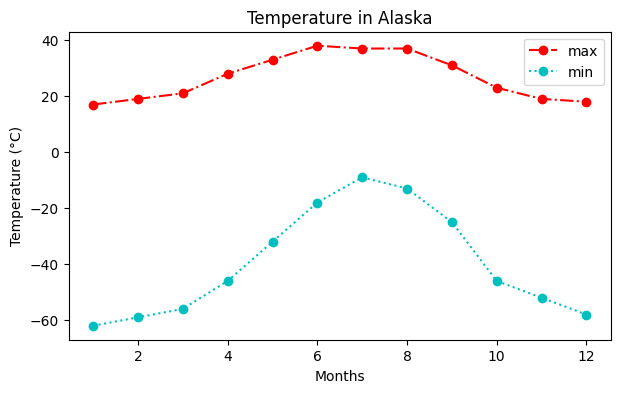

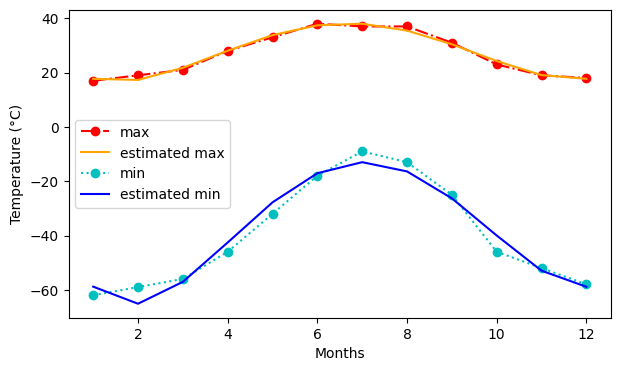

In [4]:
max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
fig = plt.figure(figsize=(7,4))

#plot of the temperatures
plt.plot(months,max, 'ro-.', label='max')
plt.plot(months, min, 'co:', label='min')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska')
plt.legend()
plt.show()

def f(months, a, b, c, d, e):
    return a * months**4 + b * months**3 + c * months**2 + d * months + e

max_popt, pcov = curve_fit(f, months, max)
min_popt, pcov = curve_fit(f, months, min)

max_estimated = f(months, *max_popt)
min_estimated = f(months, *min_popt)

fig = plt.figure(figsize=(7,4))
plt.plot(months, max, 'ro-.', label='max')
plt.plot(months, max_estimated, color='orange', label='estimated max')
plt.plot(months, min, 'co:', label='min')
plt.plot(months, min_estimated, color='blue', label='estimated min')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

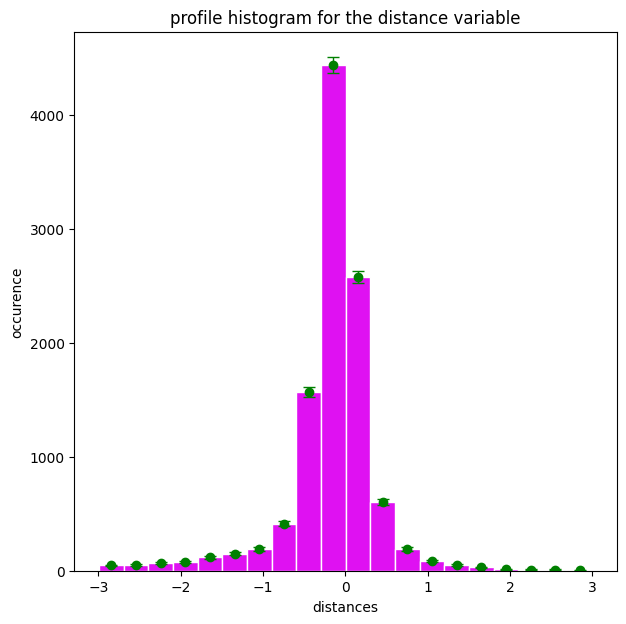

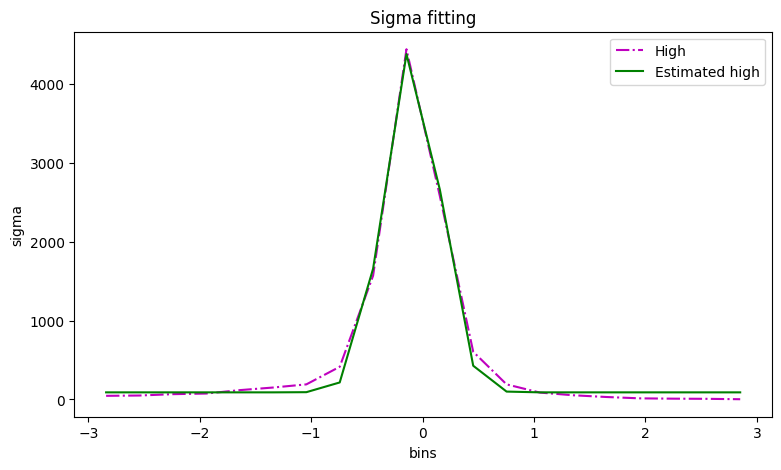

p value :  1.278767753205572e-178


In [5]:
# Read the pkl file
data = pd.read_pickle('data/residuals_261.pkl').tolist()

df = pd.DataFrame(data)
df = df[ abs(df['residuals']) < 3]

#plot the histogram
fig = plt.figure(figsize=(7,7))
n, edges, patch = plt.hist(df['residuals'], bins=20, color='#df11f2', ec='white')
plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("occurence")

#plot the poissont uncertenty
bin_center = (edges[:-1] + edges[1:]) / 2
sigma = np.sqrt(n)
plt.errorbar(bin_center, n, yerr=sigma, fmt='o', c='g', linewidth=1, capsize=4, label= "Poisson uncertainty")
plt.show()

def f(x, binCenter, offset, sigma, c):
    return c + (binCenter * stats.norm.pdf(x,offset,sigma))

popt, pcov = curve_fit(f, bin_center, n, p0=[100,1,1,1])

y_estimated = f(bin_center, *popt)

fig = plt.figure(figsize=(9,5))
plt.plot(bin_center, n, 'm-.', label='High')
plt.plot( bin_center, y_estimated, 'g', label='Estimated high')
plt.xlabel('bins')
plt.ylabel('sigma')
plt.title('Sigma fitting')
plt.legend()
plt.show()

test, p_value = stats.chisquare(n, y_estimated)
print('p value : ', p_value)
#relating to the graphics, the fit function is relaiable

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

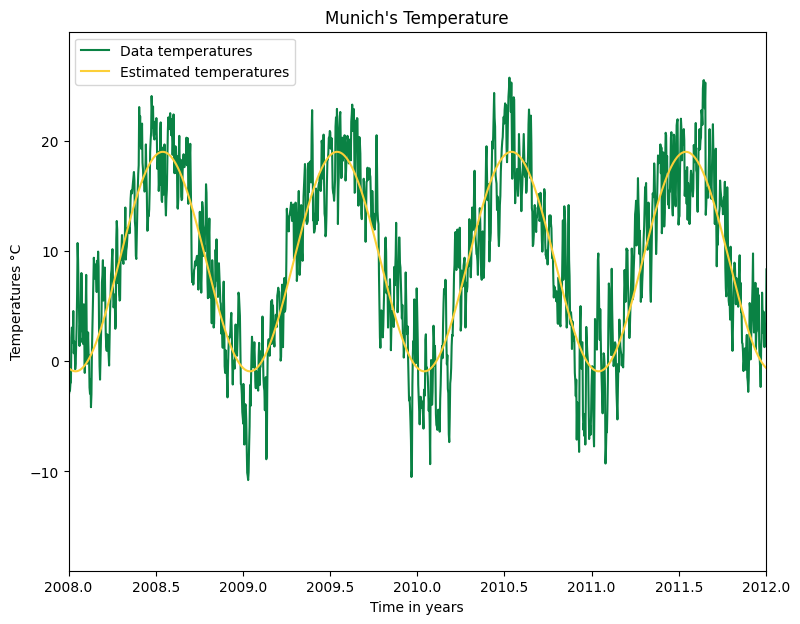

The cohefficent of the f function are:
a =  -9.955183583195634 
b= 12.31340590753564 
c= 9.040845452192942
Average temperature in Munich:  8.933222104668378
Average estimated temperature in Munich:  8.933222104681006
Predicted value for the hottest time of the year:  18.995869658316174
Predicted value for the coldest time of the year: -0.9142093884356193


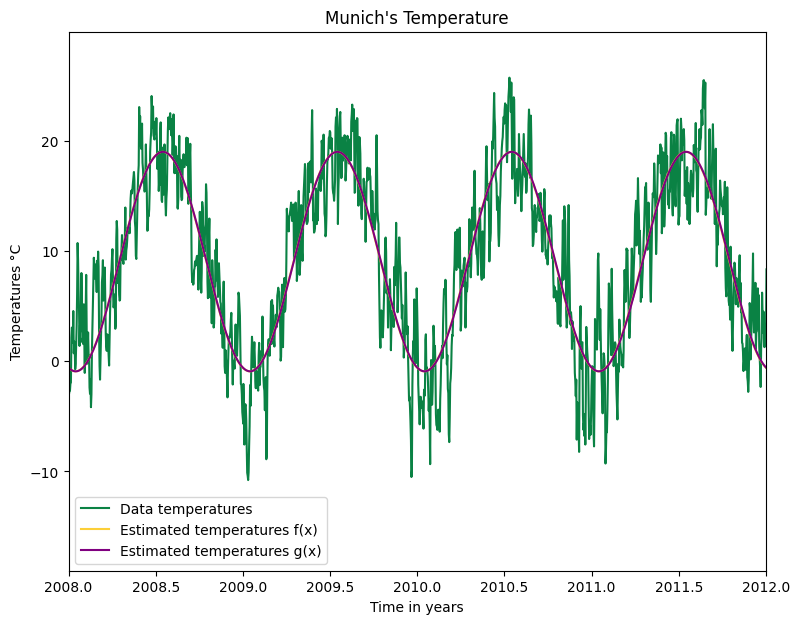

RSS for f(x):  329861.4307299942
R^2 for f(x):  0.22456793013016552
RSS for g(x):  329881.8292592943
R^2 for g(x):  0.22451997764974818
p-value: 1.000 , additional parameter necessary: NO


In [6]:
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d

#Read the file
df = pd.DataFrame(pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=' ', header=None))
df.columns=['Date', 'Temperature']

#there are some wrong temperature we need to drop, so I put a filter to drop temperature > 40 celsius degrees
df = df.drop(df[abs(df['Temperature']) > 40].index)

#compute the axis, where t is the time in years
t = df['Date']
y = df['Temperature']

#fit the function f to the data
popt_f, pcov_f = curve_fit(f, t, y)

y_estimated = f(t, *popt_f)

#Plot the datas and the fitted model with f function
plt.figure(figsize=(9,7))
plt.plot(t, y, color='#0a8244', label='Data temperatures')
plt.plot(t, y_estimated, color='#fccf38', label='Estimated temperatures')
plt.title("Munich's Temperature")
plt.xlabel('Time in years')
plt.ylabel('Temperatures °C')
plt.xlim(2008, 2012)
plt.legend()
plt.show()

print('The cohefficent of the f function are:\na = ', popt_f[0], '\nb=', popt_f[1], '\nc=', popt_f[2] )
print('Average temperature in Munich: ', np.mean(y))
print('Average estimated temperature in Munich: ', np.mean(y_estimated))

print('Predicted value for the hottest time of the year: ', np.max(y_estimated))
print('Predicted value for the coldest time of the year:', np.min(y_estimated))

#the b parameter shifts the entire cosine function

#fit the function g to the data
popt_g, pcov_g = curve_fit(g, t, y)
y_estimated_g = g(t, *popt_g)

#Plot the datas and the fitted model with f function
plt.figure(figsize=(9,7))
plt.plot(t, y, color='#0a8244', label='Data temperatures')
plt.plot(t, y_estimated, color='#fccf38', label='Estimated temperatures f(x)')
plt.plot(t, y_estimated_g, color='purple', label='Estimated temperatures g(x)')
plt.title("Munich's Temperature")
plt.xlabel('Time in years')
plt.ylabel('Temperatures °C')
plt.xlim(2008, 2012)
plt.legend()
plt.show()

#Residual Sum of Squares
rss_f = np.sum((y_estimated - np.mean(y))**2)
tss = np.sum((np.mean(y) - y)**2)
r2f = 1-rss_f/tss
print('RSS for f(x): ', rss_f)
print('R^2 for f(x): ', r2f)

rss_g = np.sum((y_estimated_g - np.mean(y))**2)
r2g = 1-rss_g/tss
print('RSS for g(x): ', rss_g)
print('R^2 for g(x): ', r2g)

#The Fisher F-test 
alpha = 0.05
# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

pval= Ftest(rss_f, rss_g, 3, 4, len(t), verbose=True)
